# Bag of Words with Stemming

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
review_data = pd.read_pickle("review_data.pkl")

In [0]:
# nltk installation

!pip install nltk

import nltk
nltk.download('punkt')

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

In [0]:
def tokenize_stemming(review_data):
  """Takes input as pandas data frame with field name Text and return tokenize 
  and stemmming list"""
  # Takes some time to execute like 30 minute etc.
  X_data = []
  for i in range(review_data.shape[0]):
      token = word_tokenize(review_data.Text.iloc[i])
      for i in range(len(token)):
          token[i] = stemmer.stem(token[i])
      token = ' '.join(token)
      X_data.append(token)
  return X_data

X_data = tokenize_stemming(review_data)


    
    

In [13]:
# Stratified Test Train Spilt

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_data,review_data.Sentiment,
                                                 test_size=0.3,stratify=review_data.Sentiment,
                                                 random_state=42)
len(X_train)

254914

In [14]:
#Creating Count BOW for our dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
final_counts = count_vector.fit_transform(X_train)
print(final_counts.shape)
# here final_counts is sparse representation of document

(254914, 78542)


In [15]:
print("dimention of single document is :",len(count_vector.get_feature_names()))

dimention of single document is : 78542


* **Conclusion** : BOW with stemming gives less feature dimension as compare to simple BOW.

In [16]:
# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB()
clf.fit(final_counts,y_train)
print(clf.score(final_counts,y_train))
X_test_bow = count_vector.transform(X_test)
print(clf.score(X_test_bow,y_test))

0.9125548224106954
0.9051716247139588


* **Conclusion** : BOW with stemming Gives similar result to  *BOW*  but *BOW with stemming*   has little less dimension.

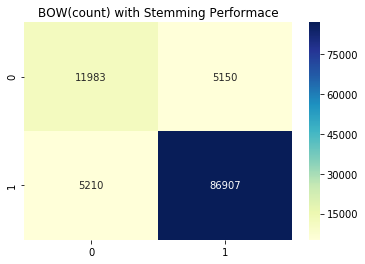

In [17]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,clf.predict(X_test_bow))
sns.heatmap(cnf,annot=True,fmt='g',cmap="YlGnBu");
plt.title("BOW(count) with Stemming Performace");